In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [2]:
tc = pd.read_csv('tc.csv')

In [3]:
X_train, X_test = train_test_split(tc, test_size=0.2, random_state=0)

y_train = X_train['Survived']
y_test = X_test['Survived']

del X_train['Survived']
del X_test['Survived']

best accuracy score = 0.824
best params: {'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
accuracy = 0.827
f1_score = 0.767
roc_auc_score = 0.810


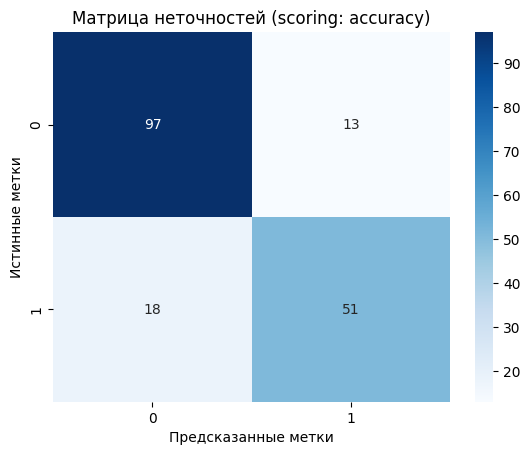

In [10]:
dtc = DecisionTreeClassifier(random_state=0)
param_grid = [{'max_depth': [3, 5, 7, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'criterion': ['gini'],
               'max_features': ['sqrt', 'log2', None]}]
gs = GridSearchCV(estimator=dtc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best accuracy score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

dtca_accuracy = clf.score(X_test, y_test)
dtca_f1_score = f1_score(y_test, y_pred)
dtca_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {dtca_accuracy:.3f}')
print(f'f1_score = {dtca_f1_score:.3f}')
print(f'roc_auc_score = {dtca_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: accuracy)')
plt.show()

best precision score = 0.844
best params: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
accuracy = 0.816
f1_score = 0.752
roc_auc_score = 0.799


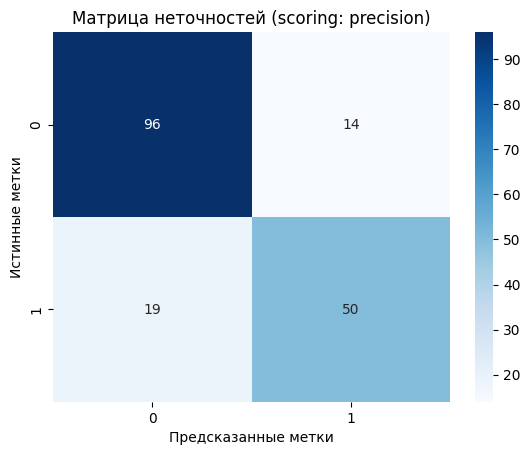

In [5]:
dtc = DecisionTreeClassifier(random_state=0)
param_grid = [{'max_depth': [3, 5, 7, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'criterion': ['gini'],
               'max_features': ['sqrt', 'log2', None]}]
gs = GridSearchCV(estimator=dtc,
                  param_grid=param_grid,
                  scoring='precision',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best precision score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

dtcp_accuracy = clf.score(X_test, y_test)
dtcp_f1_score = f1_score(y_test, y_pred)
dtcp_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {dtcp_accuracy:.3f}')
print(f'f1_score = {dtcp_f1_score:.3f}')
print(f'roc_auc_score = {dtcp_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: precision)')
plt.show()

best recall score = 0.718
best params: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
accuracy = 0.844
f1_score = 0.791
roc_auc_score = 0.830


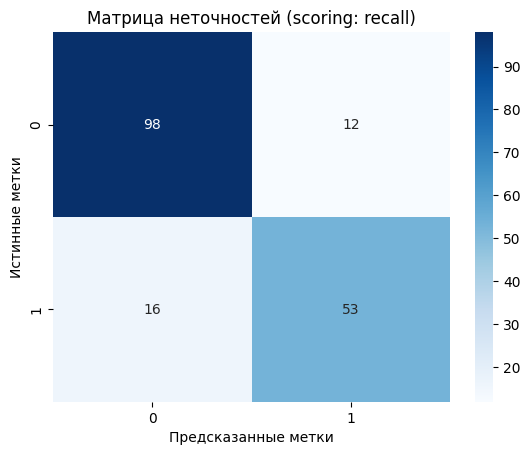

In [6]:
dtc = DecisionTreeClassifier(random_state=0)
param_grid = [{'max_depth': [3, 5, 7, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'criterion': ['gini'],
               'max_features': ['sqrt', 'log2', None]}]
gs = GridSearchCV(estimator=dtc,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best recall score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

dtcr_accuracy = clf.score(X_test, y_test)
dtcr_f1_score = f1_score(y_test, y_pred)
dtcr_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {dtcr_accuracy:.3f}')
print(f'f1_score = {dtcr_f1_score:.3f}')
print(f'roc_auc_score = {dtcr_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: recall)')
plt.show()

(0.7, 0.87)

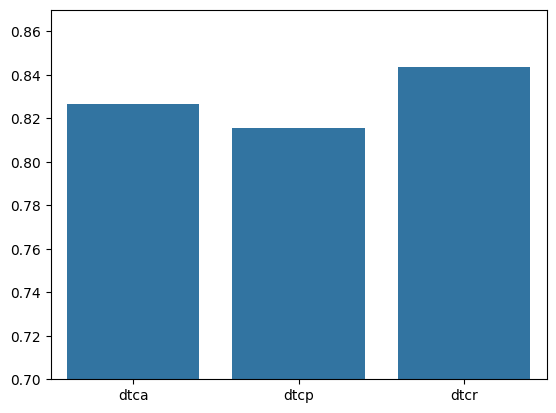

In [7]:
sns.barplot(x=['dtca', 'dtcp', 'dtcr'], y=[dtca_accuracy, dtcp_accuracy, dtcr_accuracy])
plt.ylim(0.7, 0.87)

(0.7, 0.8)

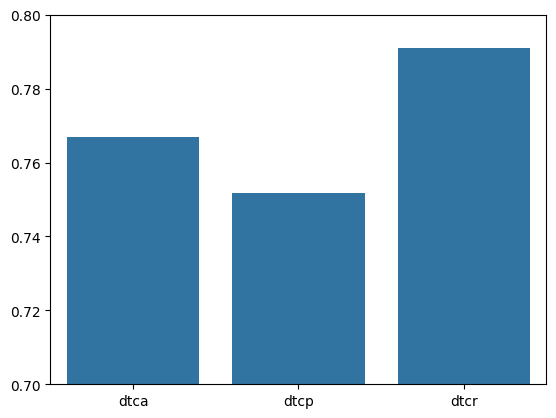

In [8]:
sns.barplot(x=['dtca', 'dtcp', 'dtcr'], y=[dtca_f1_score, dtcp_f1_score, dtcr_f1_score])
plt.ylim(0.7, 0.8)

(0.76, 0.85)

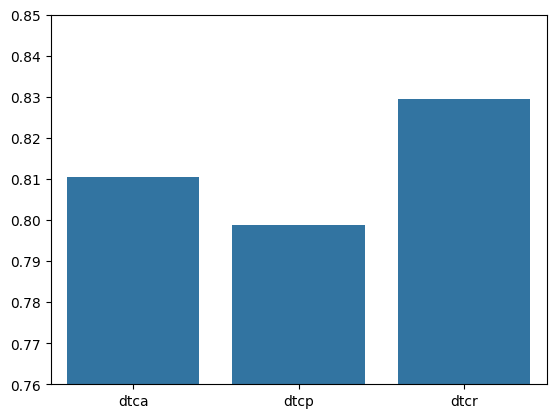

In [9]:
sns.barplot(x=['dtca', 'dtcp', 'dtcr'], y=[dtca_roc, dtcp_roc, dtcr_roc])
plt.ylim(0.76, 0.85)